In [14]:
import nltk
import gensim
from gensim.models.doc2vec import Doc2Vec

first_elements=100

docs=Doc2Vec.load("doc2vec.bin")
newdoc=[]
for doc in docs.docvecs:
   newdoc.append(doc) 

newdoc=newdoc[:first_elements]

In [15]:
import sys
import codecs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from sklearn.manifold import TSNE
 

    
df = pd.read_csv("data/articles.csv")
titles=df.Abstract.tolist()[:first_elements]
titles=[title[:20] for title in titles]
titles

['Chitosan-based hydro',
 'The deposition of th',
 'Biphasic calcium pho',
 'Cell sheets (CS) fro',
 'Phase formation proc',
 'Tissue-specific algi',
 'Urethral strictures ',
 'Chitosan scaffolds h',
 'The process of porou',
 'A method for investi',
 'In this paper, we st',
 'We proposed a novel ',
 'Bone tissue engineer',
 'The repair and recon',
 'A Body Area Nano-NET',
 'Heat treatment of ex',
 'The blend of poly(3-',
 'Receptor-ligand inte',
 'Poly(N-isopropylacry',
 'Electrospun biodegra',
 'In the present study',
 'The graft copolymers',
 'The processes of 3D ',
 'Optical immersion cl',
 'This study demonstra',
 'The resorption of fi',
 'The influence of the',
 '[No abstract availab',
 'The article presents',
 'The work is devoted ',
 'Traumatic brain inju',
 'Novel chitosan-based',
 'Acute glomerulonephr',
 'A prerequisite for s',
 'Urokinase-type plasm',
 'Interaction between ',
 'This tutorial-review',
 'Involvement of indiv',
 'This paper deals wit',
 'In this study we ver',


In [16]:

tsne = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
Y = tsne.fit_transform(newdoc)



In [23]:
Y= Y*100


Populating the interactive namespace from numpy and matplotlib


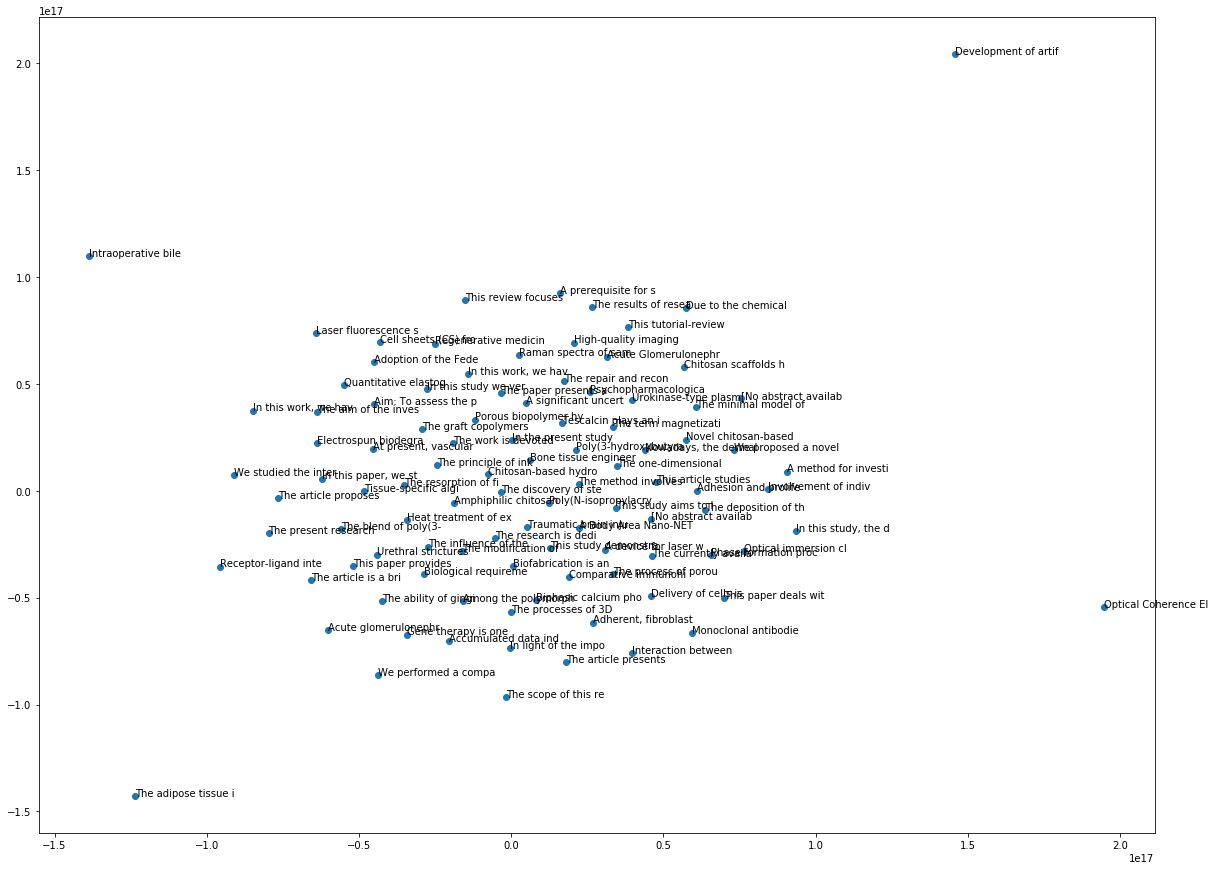

In [25]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20,15)
plt.scatter(Y[:, 0], Y[:, 1])
for label, x, y in zip(titles, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.show()
 